# Data Manipulation with Pandas

<img src="../images/python_pandas.jpg" alt="Python" style="width: 400px;"/>

# DataFrame Basics

***

We'll talk about
- How to create a DataFrame, the primary data structure in pandas 
- How to find the shape and rank of the created or existing DataFrames
- How to read DataFrames from a file
- What are indexes, and how do they work in the domain of Pandas DataFrames

## What are DataFrames?

***

DataFrames are a way to store data in rectangular grids that can easily be overviewed. Each row of these grids corresponds to measurements or values of an instance, while each column is a vector containing data for a specific variable. This means that a data frame’s rows do not need to contain, but can contain, the same type of values: they can be numeric, character, logical, etc.
<br> </br>

Data frames in Python come within the Pandas library, and they are defined as a two-dimensional labeled data structures with columns of potentially different types.
<br> </br>

In general, you could say that the Pandas data frame consists of three main components: the data, the index, and the columns.




## How do I create DataFrames?
***
DataFrames are 2 dimensional objects that can have a number of different columns for each attribute. You can create DataFrames manually or from one of the following objects:
- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- A Series
- Another DataFrame

**Creating DataFrames manually**

The function that you will use is the Pandas Dataframe() function: it requires you to pass the data that you want to put in, the indices and the columns.

Remember that the data that is contained within the data frame doesn’t have to be homogenous.

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[1, 2, 3],
                   [3, 4, 5],
                   [5, 6, 7],
                   [7, 8, 9]])
df

,0,1,2
0,1,2,3
1,3,4,5
2,5,6,7
3,7,8,9


In [2]:
df = pd.DataFrame([[1, 2, 3], [3, 4, 5], [5, 6, 7], [7, 8, 9]])

print("Shape:", df.shape)
print("Index:", df.index)

df

Shape: (4, 3)
Index: RangeIndex(start=0, stop=4, step=1)


,0,1,2
0,1,2,3
1,3,4,5
2,5,6,7
3,7,8,9


**Understanding the Index**

Before you start with adding, deleting and renaming the components of your DataFrame, you first need to know how you can select these elements.

This is where Indexes come into play, just the way you can use an idex page in a book to locate your chapters, you can use the loc() or iloc() function in pandas to access data in particular columns of your DataFrame.

We will learn about how these functions work and their subtle differences in the next sections.


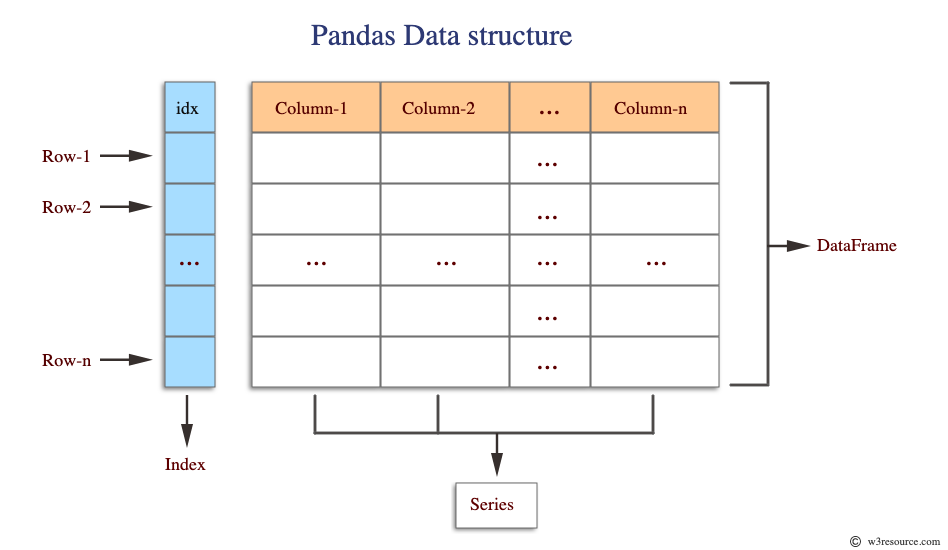

In [3]:
df2 = pd.DataFrame([[1, 2, 3], [3, 4, 5], [5, 6, 7], [7, 8, 9]],
                   index=['a', 'b', 'c', 'd'], columns=['x', 'y', 'z'])

print("Shape:", df.shape)
print("Index:", df.index)

df2

Shape: (4, 3)
Index: RangeIndex(start=0, stop=4, step=1)


,x,y,z
a,1,2,3
b,3,4,5
c,5,6,7
d,7,8,9


# The Weather Dataset: Reading DataFrames from Files
***
The Weather Dataset is a time-series data set with per-hour information about the weather conditions at a particular location. It records Temperature, Dew Point Temperature, Relative Humidity, Wind Speed, Visibility, Pressure, and Conditions.


This data is available as a CSV file. We are going to use Pandas DataFrames and analyse this dataset.


In [4]:
# Read the data into a data frame

weather_df = pd.read_csv("../data/weather_2012.csv") # 

print("Shape:", weather_df.shape)
print("Index:", weather_df.index)

Shape: (8784, 8)
Index: RangeIndex(start=0, stop=8784, step=1)


In [6]:
weather_df['Date/Time'].head()

0    2012-01-01 00:00:00
1    2012-01-01 01:00:00
2    2012-01-01 02:00:00
3    2012-01-01 03:00:00
4    2012-01-01 04:00:00
Name: Date/Time, dtype: object

**Let's convert the `Date/Time` column datatype from `object` to `timestamp` so that we can access the month directly using the attribute `dt.month`**

In [7]:
weather_df['Date/Time'] = pd.to_datetime(weather_df['Date/Time'])


# How to Analyze DataFrames?
***
The following functions help you understand and explore summaries of your data without having to view the whole DataFrame

## `.info()`
***
Provides a summary of a DataFrame: rows, columns, data types of columns (if automatically detected) and the memory usage.

For detailed summaries of the the DataFrame, you can pass optional arguments verbose=True and null_counts=True to the .info() method to output information for all of the columns

In [8]:
weather_df.info() # Bring the cursor inside the brackets of info() and hit shift+tab & see what you get.
                  # This will work for any function in Pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date/Time           8784 non-null   datetime64[ns]
 1   Temp (C)            8784 non-null   float64       
 2   Dew Point Temp (C)  8784 non-null   float64       
 3   Rel Hum (%)         8784 non-null   int64         
 4   Wind Spd (km/h)     8784 non-null   int64         
 5   Visibility (km)     8784 non-null   float64       
 6   Stn Press (kPa)     8784 non-null   float64       
 7   Weather             8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


## `.head()`
***
It is used to preview a part of a large DataFrame, similar to the linux `head` command. This reduces time and resources required if  whole DataFrame was to be fetched instead. Shows the first N rows in the data (by default, N=5).

In [9]:
weather_df.head(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## `.index`
***
This attribute provides the `index` of the dataframe.

Indexing identifies data using known indicators that allows intuitive getting and setting of subsets of the data set.

A major advantage of Pandas over NumPy is that each of the columns and rows has a label. Working with column positions is possible, but it can be hard to keep track of which number corresponds to which column.

We can work with labels using the **pandas.DataFrame.loc** method, which allows us to index using labels instead of positions.

In [10]:
weather_df.index

RangeIndex(start=0, stop=8784, step=1)

## `.unique()`
***
This method, which belongs to the `Series` object, can be useful when trying to identify unique values in a column.
- Uniques are returned in order of appearance. 
- It is significantly faster than numpy.unique and includes N/A values

In [11]:
weather_df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

## `.nunique()`
***
This method belongs to the `Series` object and can be useful when trying to identify the number of unique values in a column. 
- Excludes NA values by default
- Always returns an integer value

In [12]:
weather_df['Weather'].nunique()

50

## `.value_counts()`
***
This method, which belongs to the `Series` object, can be useful when trying to identify unique values and their counts in a column
- The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
- Excludes NA values by default.

In [13]:
weather_df['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

# In-class Task


### How can we get the count for Clear ?
***

In order to get only the number of times when the weather was exactly 'Clear' , we need to used Square brackets after `.value_counts` 
eg. `.value_counts()[3]`

In [14]:
# Your solution here



# Data Manipulation : Gets you desired results
***
The true power of the Pandas DataFrame is the ease and flexibility of manipulating data to get your desired results.

Pandas is best at handling tabular data sets comprising different variable types (integer, float, double, etc.). 

In addition, the pandas library can also be used to perform even the most naive of tasks such as loading data or doing feature engineering on time series data.

## Selection (Part 1)
***
How do you select particular rows/columns from the DataFrame ?

The DataFrame object supports indexing operations just like the Python `list` class and the Pandas Series object, but is much faster and more powerful.

Note that when you extract a single row or column, you get a one-dimensional object as output. That is called a pandas Series. The values on the left are just labels taken from the dataframe index. 

On the other hand, when we extract portions of a pandas dataframe, we get a two-dimensional DataFrame type of object. Something to keep in mind for later.

### How to get the Weather column from the "weather_df" dataframe

In [15]:
col = weather_df['Weather']

print(type(col))
col.head()

<class 'pandas.core.series.Series'>


0                     Fog
1                     Fog
2    Freezing Drizzle,Fog
3    Freezing Drizzle,Fog
4                     Fog
Name: Weather, dtype: object

### How to get the Weather and Temperature columns from the "weather_df" dataframe

In [16]:
two_cols = weather_df[['Weather', 'Temp (C)']] # Take a good look at those brackets. There are two sets of them
                                               # to access more than one columns. 
print(type(two_cols))
two_cols.head()

<class 'pandas.core.frame.DataFrame'>


,Weather,Temp (C)
0,Fog,-1.8
1,Fog,-1.8
2,"Freezing Drizzle,Fog",-1.8
3,"Freezing Drizzle,Fog",-1.5
4,Fog,-1.5


**Keep in mind Whenever you need to take more than two columns need to put double sqaure  like above example**

## **Get the first 25 rows from the "weather_df" dataframe**
***
**Important**: This slicing would work even if the row index had non-numeric labels, because slicing works here the same way as a list

In [17]:
weather_df[:25]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog



**How to get the first 3 alternating rows from the "weather_df" dataframe, but only the Visibility and Relative Humidity columns**


In [18]:
# solution 1
result1 = weather_df[:6:2][['Rel Hum (%)', 'Visibility (km)']]

# solution 2
result2 = weather_df[['Rel Hum (%)', 'Visibility (km)']][:6:2]

# are they the same?
result1 == result2

,Rel Hum (%),Visibility (km)
0,True,True
2,True,True
4,True,True


#### So which of the two solutions should you use?
***
**Answer**: Neither. Because we're indexing more than once (Chained Indexing).
When you use chained indexing, the order and type of the indexing operation partially determine whether the result is a slice into the original object, or a copy of the slice.

Let's analyse (break down) one of the above solutions.

In [19]:
# first indexing
df1 = weather_df[:6:2]

# second indexing
df2 = df1[['Rel Hum (%)', 'Visibility (km)']]

While both results are correct in this **read-only** case, chained indexing may give unpredictable behaviours when **writing** to a dataframe.

This is because indexing could either return a "view" (of slices of the dataframe), or a copy of the dataframe.

## Selection (Part 2)
***
Pandas provides a powerful way to work with both rows and columns together, optionally using their label indices or numeric indices.

- **`.loc :`**<br/>
Purely label-location based indexer for selection by label (but may also be used with a boolean array).<br/>
**Important: If you use slicing in loc, it will return the end index as well**
<br/><br/>

- **`.iloc:`**<br/>
Purely integer-location based indexing for selection by position (but may also be used with a boolean array).

Allowed inputs are:
- A single label, e.g. 5 or 'a'
- A list or array of labels, e.g. ['a', 'b', 'c']
- A slice object with labels, e.g. 'a':'f'


In [20]:
# Using loc or iloc
# NOTE: slice is `:5:2`, not 6 !
weather_df[['Visibility (km)','Rel Hum (%)']].iloc[:5:2]

,Visibility (km),Rel Hum (%)
0,8.0,86
2,4.0,89
4,4.8,88



## Filtering
***

![Filter](../images/filters1.jpg)
Image Source:https://pixabay.com/en/yashica-filter-camera-vintage-711794/
<br/>

Anything that takes in data, processes it, and provides an output

Input Data ⟶ Filter ⟶ Output Data

Filtering rows of a DataFrame is an almost mandatory task for Data Analysis with Python. Given a Data Frame, we may not be interested in the entire dataset but only in specific rows.


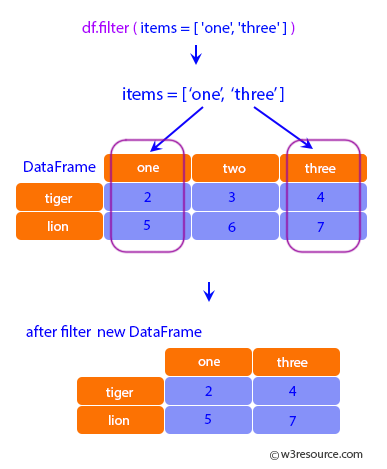


### Find all instances when snow was recorded
***
Whether or not it snowed can be found out using the Weather column.

Note that this routine does not filter a dataframe on its contents. The filter is applied to the labels of the index.

In [21]:
weather_df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [22]:
# Basically, we want a way to "filter out" records that have the word "snow" (case insensitive) in the last column

snowed_filter = weather_df['Weather'].str.lower().str.contains('snow')
weather_df[snowed_filter]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
41,2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


**Find all instances when wind speed was above 24 and visibility was 25**

In [23]:
df = weather_df[(weather_df['Wind Spd (km/h)'] > 24) & (weather_df['Visibility (km)']== 25)]
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
23,2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,2012-01-02 03:00:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy


## Summary / Cheatsheet: Selection/Indexing/Filtering
***
This is a handy reminder for what syntax will get what result.

Syntax | Function | Remarks
:--- | :--- | :---
**`df['some_label']`** |  Get the (single) Column referenced by name `some_label` | A **str** is provided
**`df[['label1', 'label2']]`** | Get multiple columns referenced by given names | A **list** is provided 
**`df[start:end:step]`** | Get corresponding rows (same as list slicing) | A **slicing operator**<br/> is provided
**`df[boolean array/df]`** | Get corresponding rows (same as list slicing) | A **filter object** is provided
**`df.loc [row_sel, col_sel]`** | Select specified rows and columns (by labels) | 
**`df.iloc[row_sel, col_sel]`** | Select specified rows and columns (by index) | 


![](../images/Week_4_R_vs_Python.jpeg)
<br/>

Both R and Python are in parity to each other regardless of your problem. But, if you want something which is multi purpose, growing yet flexible for data analysis then Python is the winner of the game!. There are a few more reasons that give Python an edge over R.
<br/>





## Working with Columns
***
- We will learn how to carry out Series operations on DataFrame Columns
- How to add or update columns within a DataFrame
- How to rename specific columns
- How to delete or drop a column that is no longer required for analysis

### Series Operations
***
A series is a one-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object supports both integer- and label-based indexing and provides a host of methods for performing operations involving the index. Statistical methods from ndarray have been overridden to automatically exclude missing data (currently represented as NaN).

Operations between Series (+, -, /, , *) align values based on their associated index values– they need not be the same length. The result index after operation will be the sorted union of the two indexes.

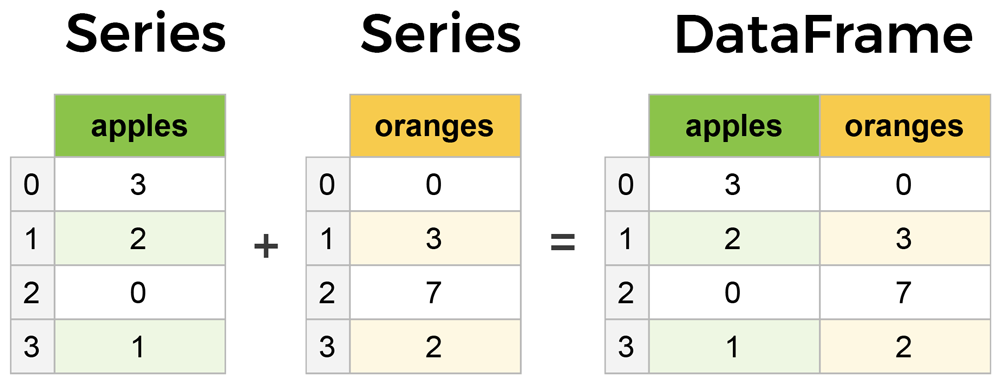

Add 10 to the values in the column "Wind Spd (km/h)" using the "+" operator

In [24]:
add_10 = weather_df["Wind Spd (km/h)"] + 10
add_10.head()

0    14
1    14
2    17
3    16
4    17
Name: Wind Spd (km/h), dtype: int64

Multiply the values in the 'Visibility (km)' column by 2 using the asterisk (*) operator

In [25]:
mult_2 = weather_df['Visibility (km)'] * 2
mult_2.head()

0    16.0
1    16.0
2     8.0
3     8.0
4     9.6
Name: Visibility (km), dtype: float64

Add the "Temp (C)" and "Dew Point Temp (C)" columns as series "temperature"

THis can be done by simply passing the column names and using the "+" operator

In [26]:
temperature = weather_df["Temp (C)"] + weather_df["Dew Point Temp (C)"]
temperature.head()

0   -5.7
1   -5.5
2   -5.2
3   -4.7
4   -4.8
dtype: float64

## Apply / Call Functions

## `.apply()`
***

You can pass any number of arguments to the function that apply is calling through either unnamed arguments, passed as a tuple to the args parameter, or through other keyword arguments internally captured as a dictionary by the kwds parameter.

Invoke function on values of Series. Can be a NumPy function that applies to the entire Series or a Python function that only works on single values.

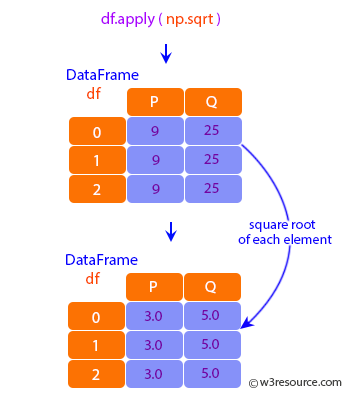

In [27]:
# Applying custom functions

def times2(value):
    return value * 2

t2 = weather_df['Visibility (km)'].apply(times2)
t2.head()

0    16.0
1    16.0
2     8.0
3     8.0
4     9.6
Name: Visibility (km), dtype: float64

## `.describe()`
***

The above function is used to summarize the  central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [48]:
weather_df['Visibility (km)'].describe()

count    8784.000000
mean       27.664447
std        12.622688
min         0.200000
25%        24.100000
50%        25.000000
75%        25.000000
max        48.300000
Name: Visibility (km), dtype: float64

### Adding/Updating Columns

In [29]:
visibility_in_meter = weather_df["Visibility (km)"] * 1000  
weather_df["Visibility (m)"] = visibility_in_meter

weather_df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Visibility (m)
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,8000.0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,8000.0
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",4000.0
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",4000.0
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4800.0


### Renaming Columns

## `.rename()`
***

Alter Series index labels or name. It will replace the existing names with the names you provide, in the order you provide.

You can also assign the names by index.

The rename() method allows you to relabel an axis based on some mapping (a dict or Series) or an arbitrary function.

In [30]:
# Notice the "inplace=True" parameter. This means the renaming has been assigned in the old DataFrame itself

weather_df.rename(columns={'Visibility (m)': 'Visibility (meters)'}, inplace=True)
weather_df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Visibility (meters)
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,8000.0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,8000.0
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",4000.0
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",4000.0
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4800.0


### Deleting Columns

## `.drop()`
***

Return new object with labels in requested axis removed.

Note that Pandas uses zero based numbering, so 0 is the first row, 1 is the second row, etc.
You can select ranges relative to the top or drop relative to the bottom of the DataFrame as well.

- Note: Specifying both labels and index or columns will raise a ValueError.

In [31]:
# Since we have not mentioned inplace=True, it returns a new dataframe.
weather_df.drop(labels=['Visibility (meters)'], axis=1).head(3)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


In [32]:
# Alternatively, you can also write
# del weather_df2['Visibility (meters)']



## Sorting
***

## `.sort_values()`
***

Sort by the values along either axis, in a user specified order. The order can be specified by selecting true or false for the "ascending" parameter.

In [33]:
sorted_by_temp = weather_df.sort_values('Temp (C)', ascending=False)  # can be inplace as well
sorted_by_temp.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Visibility (meters)
4695,2012-07-14 15:00:00,33.0,16.8,38,22,48.3,101.31,Mainly Clear,48300.0
4143,2012-06-21 15:00:00,33.0,19.0,44,24,24.1,100.20,Mainly Clear,24100.0
4696,2012-07-14 16:00:00,32.9,15.3,35,24,48.3,101.26,Mainly Clear,48300.0
5199,2012-08-04 15:00:00,32.8,18.8,44,17,24.1,101.39,Clear,24100.0
4694,2012-07-14 14:00:00,32.7,15.3,35,28,48.3,101.35,Mainly Clear,48300.0


### Which were the top 10 hottest values and their counts?

In [34]:
sorted_value_counts = weather_df['Temp (C)'].value_counts().sort_values(ascending=False)
sorted_value_counts.iloc[:10]

16.6    65
1.1     58
0.8     47
1.5     45
19.3    44
21.1    43
2.6     43
0.4     41
1.3     40
14.6    39
Name: Temp (C), dtype: int64

### What is the mean temperature recorded by month?

## `.mean()`
***

- It is an aggregation function used to combine multiple values
- Return the mean of the values for the requested axis
- Returns scalar or Series (if level specified)

In [35]:
# One Solution
mean_temperatures = {}

for month in range(1, 13):
    mean_temperatures[month] = weather_df.loc[weather_df['Date/Time'].dt.month == month, 'Temp (C)'].mean()

pd.Series(mean_temperatures)

1     -7.371505
2     -4.225000
3      3.121237
4      7.009306
5     16.237769
6     20.134028
7     22.790054
8     22.279301
9     16.484444
10    10.954973
11     0.931389
12    -3.306317
dtype: float64



# Pivot Tables : Excellent way to Summarize your Data!
***
- A pivot table is a tool that allows you to reorganize and summarize selected columns and rows of data in a dataframe <br/><br/>

- Pivot tables provide an easy way to subset by one column and then apply a calculation like a sum or a mean <br/><br/>

- Pivot tables first groups and only then applies a calculation


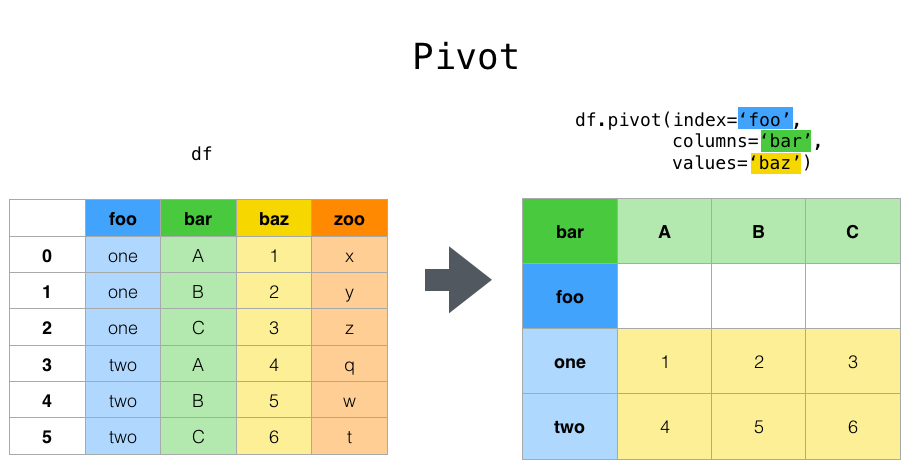

In [36]:
data = {
    'A': ['foo','foo','foo','bar','bar','bar'],
    'B': ['one','one','two','two','one','one'],
    'C': ['x','y','x','y','x','y'],
    'D': [1, 3, 2, 5, 4, 1]
}

df = pd.DataFrame(data)
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [37]:
pivot_df = df.pivot_table(
                values='D',      # We want to aggregate the values of which column?
                index='A',       # We want to use which column as the new index?
                columns=['C'],   # We want to use the values of which column as the new columns? (optional)
                aggfunc=np.sum)  # What aggregation function to use ?


pivot_df

C,x,y
A,,
bar,4,6
foo,3,3


In [38]:
# convert it back to a simple index

pivot_df.reset_index()

C,A,x,y
0,bar,4,6
1,foo,3,3


### What is the mean temperature recorded by month?

In [39]:
mean_temperature_df = weather_df.pivot_table(values='Temp (C)', index=weather_df['Date/Time'].dt.month, aggfunc=np.mean)
mean_temperature_df # the numbers 1 to 12 denote the respective months from January to December.

,Temp (C)
Date/Time,
1,-7.371505
2,-4.225000
3,3.121237
4,7.009306
5,16.237769
6,20.134028
7,22.790054
8,22.279301
9,16.484444




# Group By
***
The groupby method allows you to group rows of data together and call aggregate functions that applies to the whole group.

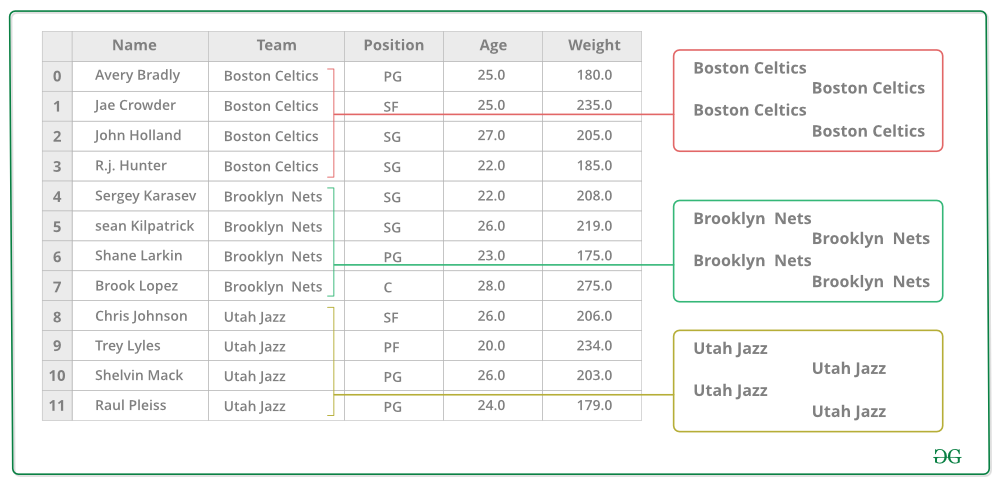

Any groupby operation involves one of the following operations on the original object. They are −
- Splitting the Object
- Applying a function
- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- Aggregation − computing a summary statistic
- Transformation − perform some group-specific operation
- Filtration − discarding the data with some condition

In [40]:
mean_temperature_df2 = weather_df.groupby(weather_df['Date/Time'].dt.month).agg(np.mean).reset_index()
mean_temperature_df2

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Visibility (meters)
0,1,-7.371505,-12.294758,68.383065,18.108871,22.100269,101.005349,22100.268817
1,2,-4.225000,-9.221695,68.956897,14.837644,25.182184,101.142414,25182.183908
2,3,3.121237,-3.488575,64.862903,14.514785,26.177957,101.335255,26177.956989
3,4,7.009306,-1.934583,56.150000,17.369444,31.777083,100.716833,31777.083333
4,5,16.237769,8.080780,61.760753,12.846774,29.418548,101.057164,29418.548387
5,6,20.134028,11.738056,60.643056,14.681944,32.104167,100.784222,32104.166667
6,7,22.790054,14.595430,62.017473,11.887097,33.655108,100.828333,33655.107527
7,8,22.279301,15.644758,67.943548,13.931452,30.192608,100.927097,30192.607527
8,9,16.484444,10.757917,71.165278,14.108333,30.603472,101.087903,30603.472222
9,10,10.954973,6.533468,75.731183,15.475806,25.111022,100.909368,25111.021505



# Concat, Merge and Join 
<br/>

***
There are 3 key ways of combining DataFrames together:

- **Concatenation**: Concatenation glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on <br/><br/>
- **Merging**: The merge function allows you to merge DataFrames together using a similar logic as merging SQL Tables together<br/><br/>
- **Join**: Join is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame

## Concat

Many a time, we are required to combine different arrays. So, instead of typing each of their elements manually, you can use array concatenation to handle such tasks easily.

it is used to append one (or more) dataframes one below the other (or sideways, depending on whether the axis option is set to 0 or 1).

In [49]:
df1 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
}, index=[0, 1, 2, 3])

df2 = pd.DataFrame({
    'A': ['A4', 'A5', 'A6', 'A7'],
    'B': ['B4', 'B5', 'B6', 'B7'],
    'C': ['C4', 'C5', 'C6', 'C7'],
    'D': ['D4', 'D5', 'D6', 'D7']
}, index=[4, 5, 6, 7])

df3 = pd.DataFrame({
    'A': ['A8', 'A9', 'A10', 'A11'],
    'B': ['B8', 'B9', 'B10', 'B11'],
    'C': ['C8', 'C9', 'C10', 'C11'],
    'E': ['D8', 'D9', 'D10', 'D11']
}, index=[8, 9, 10, 11])

In [50]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [51]:
# if you don't specify an axis, it defaults to axis=0, which means it appends to rows
pd.concat([df1, df2, df3])

,A,B,C,D,E
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,A4,B4,C4,D4,NaN
5,A5,B5,C5,D5,NaN
6,A6,B6,C6,D6,NaN
7,A7,B7,C7,D7,NaN
8,A8,B8,C8,NaN,D8
9,A9,B9,C9,NaN,D9


In [52]:
# axis=1 means concat along columns

pd.concat([df1, df2, df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,E
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


## Join
***
Simply join two DFs having potentially different row indices.

It is used to merge 2 dataframes on the basis of the index.

You can do both inner as well as outer joins using the join function in pandas
- Parameters {‘inner’, ‘outer’}, default ‘outer’. Outer for union and inner for intersection.

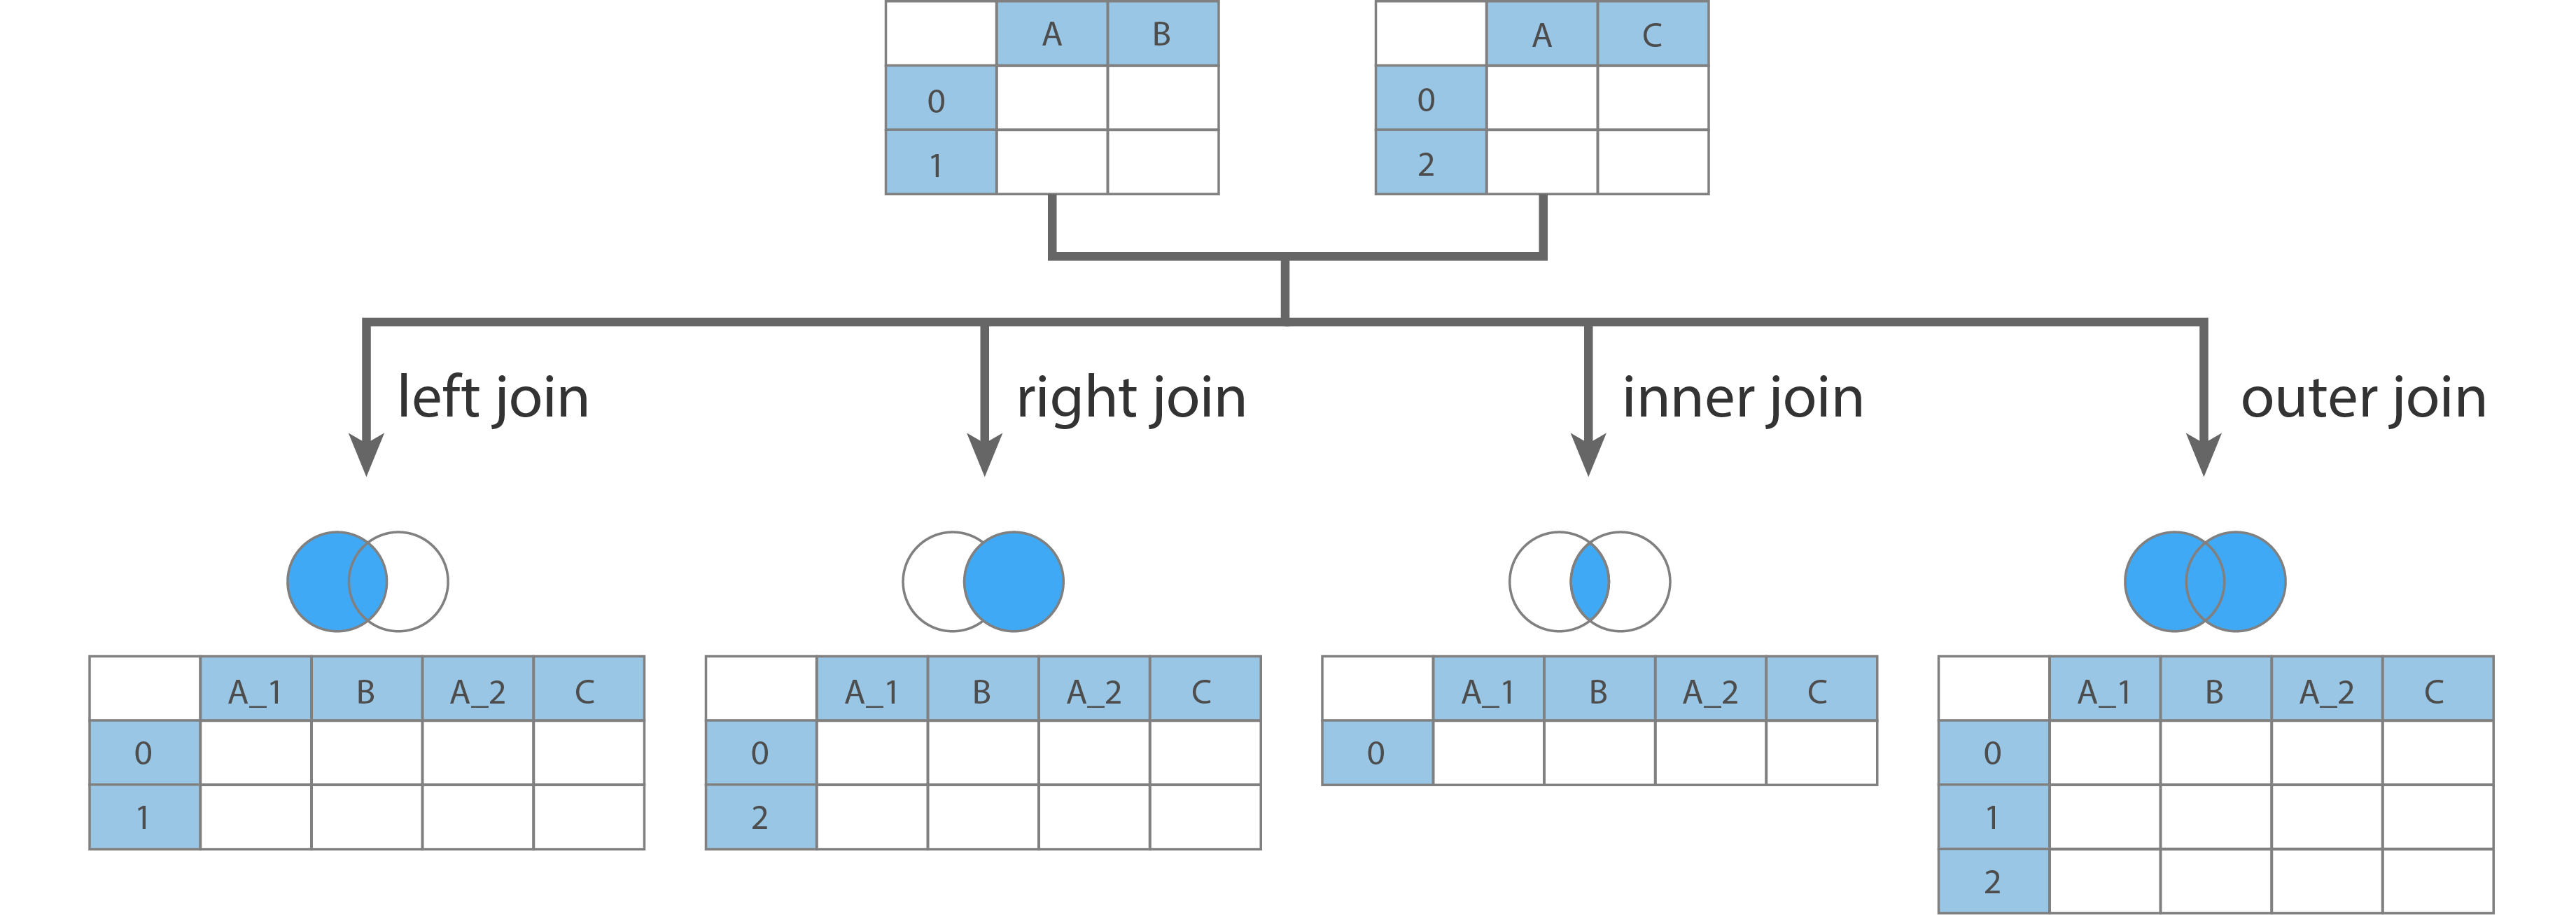

In [53]:
# Join
left_df = pd.DataFrame({
    'A': ['A0', 'A1', 'A2'],
    'B': ['B0', 'B1', 'B2']
}, index=['K0', 'K1', 'K2']) 

right_df = pd.DataFrame({
    'C': ['C0', 'C2', 'C3'],
    'D': ['D0', 'D2', 'D3']
}, index=['K0', 'K2', 'K3'])

left_df.join(right_df, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## Merge

Many a times you will be working with multiple dataframes all at once.

The merge function allows them to be combined into a single data frame.

allows you to merage values in the basis of values of common columns (indices can also be used, use left_index=True and/or right_index=True).

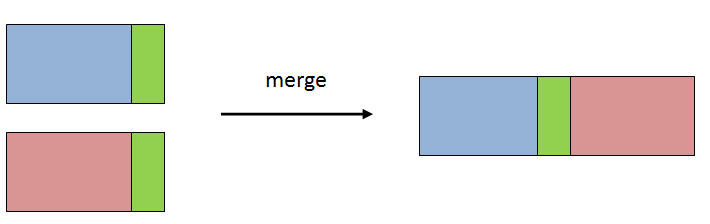

In [54]:
# Merging on multiple keys
left = pd.DataFrame({
    'key1': ['K0', 'K0', 'K1', 'K2'],
    'key2': ['K0', 'K1', 'K0', 'K1'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
})
    
right = pd.DataFrame({
    'key1': ['K0', 'K1', 'K1', 'K2'],
    'key2': ['K0', 'K0', 'K0', 'K0'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
})

pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [55]:
# other options are 'inner', 'left', 'right'

pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


# Further Reading
***
- Pandas documentation: http://pandas.pydata.org/
- 10 minutes to pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Cookbook- Useful Pandas Recipes: https://pandas.pydata.org/pandas-docs/stable/cookbook.html
- Pandas and Python Top 10: http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/
- Intro to Pandas Data Structures: http://www.gregreda.com/2013/10/26/

# Thank You
***
